# 중간 발표 내용

##  - 문제 소개 : 나의 독서 데이터를 통한 패턴 확인

###  - 기획 의도 : 데이터 분석이라는 거창한 주제를 생활 속에서 시작하기.

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt # plot 관련
import matplotlib.font_manager # font 관련
import seaborn as sns # plot 관련
from datetime import datetime # 시간 관련

In [3]:
%matplotlib inline

In [4]:
book = pd.read_excel('book.xlsx', encoding = "utf-8") # 책 읽은 내역 데이터
book_times = pd.read_excel('book_times.xlsx') # 책 읽은 시간 내역

In [5]:
book.head() # 데이터 내용 확인

,Title,Subtitle,Author,Tranlator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Category,Started Reading,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category
0,프레임,나를 바꾸는 심리학의 지혜,최인철,NaN,21세기북스,39253,eBook,188,9788950911546,Read,...,자기계발,2015-12-30,2016-01-05,6,N,Y,0,지인추천,NaN,NaN
1,왜 나는 범죄를 공부하는가,최고의 프로파일러 표창원 박사의 두려움 없는 공부,표창원,NaN,다산북스,2015-03-17 00:00:00,eBook,229,9791130604909,Read,...,자기계발,2016-01-05,2016-01-07,2,N,N,0,검색,정의의적들,TV프로그램
2,정의의 적들,"정의는 때로 천천히, 하지만 반드시 온다",표창원,NaN,한겨레출판,2014-05-19 00:00:00,eBook,312,8984318116,Read,...,사회학,2016-01-08,2016-01-11,3,N,Y,0,검색,정의의적들,TV프로그램
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,인문일반,2016-01-12,2016-01-14,2,Y,N,0,지인추천,NaN,NaN
4,숨겨진 심리학,NaN,표창원,NaN,토네이도,2011-04-11 00:00:00,book,226,9788994013343,Read,...,자기계발,2016-01-14,2016-01-18,4,Y,Y,0,검색,정의의적들,TV프로그램


In [6]:
book_times.head()

,ISBN,Start Read Time,End Read Time,Read Place,Move Place,Not Read Reason,Weekend Yn,Start Page Num,End Page Num
0,9788947540674,2016-03-03 13:10:00,2016-03-03 13:43:00,버스,학교,NaN,1.0,1,38
1,9788947540674,2016-03-03 21:16:00,2016-03-03 22:13:00,버스,집,NaN,1.0,38,87
2,9788947540674,2016-03-04 14:10:00,2016-03-04 14:34:00,버스,학교,NaN,1.0,87,112
3,9788947540674,2016-03-04 18:50:00,2016-03-04 19:45:00,버스,집,NaN,1.0,112,153
4,9788947540674,2016-03-05 08:13:00,2016-03-05 08:53:00,버스,학교,NaN,1.0,153,187


###### 위와 같이 데이터를 불러와 확인이 가능하지만, 어떤 필드가 있는지 확인 할 경우는 다음과 같은 명령어를 사용

In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 23 columns):
Title               18 non-null object
Subtitle            6 non-null object
Author              18 non-null object
Tranlator           2 non-null object
Publisher           14 non-null object
Publish Date        18 non-null object
Format              18 non-null object
Pages               18 non-null int64
ISBN                18 non-null int64
Status              18 non-null object
Rating              18 non-null int64
Yes24 Rating        18 non-null int64
Tag                 0 non-null float64
Category            18 non-null object
Started Reading     18 non-null datetime64[ns]
Finished Reading    18 non-null datetime64[ns]
Reading Period      18 non-null int64
Borrowed            18 non-null object
Have Weekend        18 non-null object
Reading Time        18 non-null int64
Read Reason         18 non-null object
Found Route         12 non-null object
Route Category      12 non-null

###### 데이터에서 변수의 기술통계량을 확인하고 싶을 경우 다음과 같은 명령어 사용. 실행해보면 수치화된 변수만 나타내는 것을 볼 수 있다.

In [8]:
book.describe()

,Pages,ISBN,Rating,Yes24 Rating,Tag,Reading Period,Reading Time
count,18.000000,1.800000e+01,18.000000,18.000000,0.0,18.000000,18.000000
mean,330.166667,8.702916e+12,9.222222,8.333333,NaN,4.611111,80.888889
std,95.030181,3.162891e+12,1.352799,0.766965,NaN,2.500327,139.697105
min,188.000000,8.934973e+09,5.000000,8.000000,NaN,1.000000,0.000000
25%,284.250000,9.788953e+12,8.250000,8.000000,NaN,2.250000,0.000000
50%,319.500000,9.788994e+12,10.000000,8.000000,NaN,5.000000,0.000000
75%,360.750000,9.790597e+12,10.000000,8.000000,NaN,6.000000,150.750000
max,586.000000,9.791196e+12,10.000000,10.000000,NaN,9.000000,398.000000


###### 그래프에 한글 표시를 위한 font 확인하기

In [10]:
print ([f.name for f in matplotlib.font_manager.fontManager.ttflist])  # 그래프에 한글 표시를 위한 코드

['Bitstream Vera Serif', 'STIXGeneral', 'STIXGeneral', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'cmex10', 'Bitstream Vera Sans Mono', 'STIXSizeOneSym', 'Bitstream Vera Sans', 'Bitstream Vera Serif', 'STIXSizeFiveSym', 'cmr10', 'STIXGeneral', 'Bitstream Vera Sans Mono', 'STIXSizeFourSym', 'Bitstream Vera Sans', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'Bitstream Vera Sans Mono', 'STIXNonUnicode', 'Bitstream Vera Sans', 'cmss10', 'Bitstream Vera Sans Mono', 'cmtt10', 'Bitstream Vera Sans', 'cmsy10', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'Vivaldi', 'ParkAvenue BT', 'Garamond', 'Traditional Arabic', 'Yj TEUNTEUN Bold', 'Haan Cooljazz M', 'Comic Sans MS', 'Century Schoolbook', 'Trebuchet MS', 'EucrosiaUPC', 'Microsoft New Tai Lue', 'Calibri', '??????', 'EucrosiaUPC', 'HYsupB', 'Aparajita', 'SimSun-ExtB', 'Angsana New', 'JasmineUPC', 'Elephant', 'Stencil', 'Haan YHead B', 'Arabic Typesetting', 'Brush Script MT',

In [11]:
matplotlib.rc('font', family='HCR Dotum') # font 지정

###### 카테고리별 책 수 확인

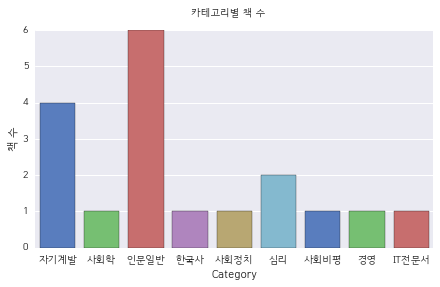

In [12]:
cate_g = sns.factorplot('Category', kind = 'count', data=book,aspect=1.5, palette="muted") # aspect : 축을 늘려줌, palette : 색지정
cate_g.fig.suptitle("카테고리별 책 수")
cate_g.set_ylabels("책 수")
cate_g.fig.subplots_adjust(top=.9)

###### 빌린 여부 확인하기

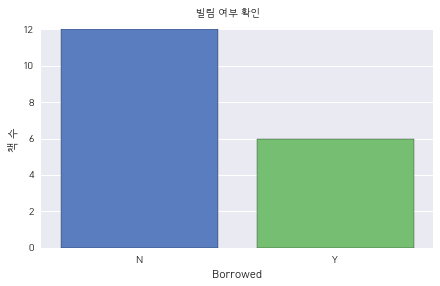

In [13]:
borrow_g = sns.factorplot('Borrowed', kind = 'count', data=book, aspect = 1.5, palette = "muted")
borrow_g.fig.suptitle("빌림 여부 확인")
borrow_g.set_ylabels("책 수")
borrow_g.fig.subplots_adjust(top=.9)

###### 읽은 수단 별 책 수 확인

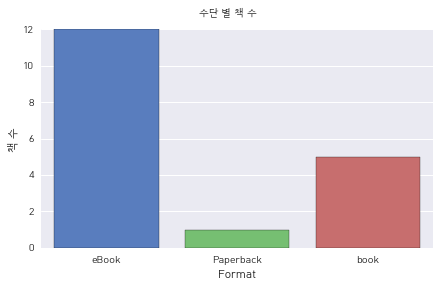

In [14]:
Format_g = sns.factorplot('Format', kind='count', data=book, aspect=1.5, palette="muted")
Format_g.fig.suptitle("수단 별 책 수")
Format_g.set_ylabels("책 수")
Format_g.fig.subplots_adjust(top=.9)

###### 월별 책 수를 확인 하기 위한 데이터 처리

In [16]:
book['Month'] = book['Started Reading'].dt.month

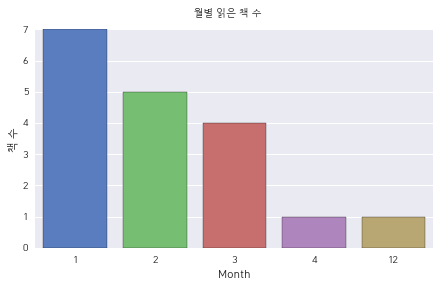

In [17]:
Month_g = sns.factorplot('Month', kind='count', data=book, aspect=1.5, palette = 'muted')
Month_g.fig.suptitle("월별 읽은 책 수")
Month_g.set_ylabels("책 수")
Month_g.fig.subplots_adjust(top=.9)

###### 주말을 포함해서 읽은 경우 확인

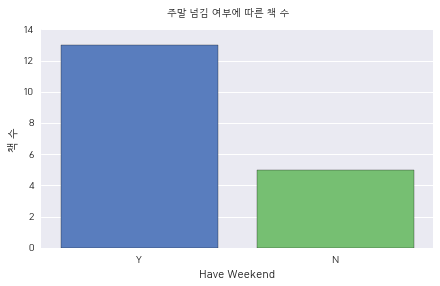

In [18]:
Week_g = sns.factorplot('Have Weekend', kind = 'count', data=book, aspect=1.5, palette = 'muted')
Week_g.fig.suptitle("주말 넘김 여부에 따른 책 수")
Week_g.set_ylabels("책 수")
Week_g.fig.subplots_adjust(top=.9)

###### 주말을 넘겼다는 것을 보고 일단, 책이 지루하지 않았나 하고 생각하여 데이터를 두개로 나눔

In [19]:
Week_df = book[book['Have Weekend'] == 'Y' ] # 주말포함
No_Week_df = book[book['Have Weekend'] == 'N' ] # 주말제외

###### 각 데이터에 대해 확인

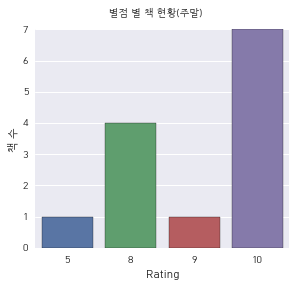

In [20]:
WeekRat_g = sns.factorplot('Rating', kind='count', data= Week_df)
WeekRat_g.fig.suptitle("별점 별 책 현황(주말)")
WeekRat_g.set_ylabels("책 수")
WeekRat_g.fig.subplots_adjust(top=.9)

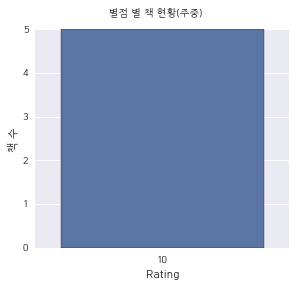

In [21]:
NoWeekRat_g = sns.factorplot('Rating', kind='count', data= No_Week_df)
NoWeekRat_g.fig.suptitle("별점 별 책 현황(주중)")
NoWeekRat_g.set_ylabels("책 수")
NoWeekRat_g.fig.subplots_adjust(top=.9)

###### 주말을 넘긴 경우 평점이 대체적으로 고르게 나온것을 확인

In [22]:
Week_df['Read Reason'].value_counts()

검색      8
지인추천    4
관심      1
Name: Read Reason, dtype: int64

In [23]:
No_Week_df['Read Reason'].value_counts()

지인추천    2
검색      2
관심      1
Name: Read Reason, dtype: int64

###### 책 읽은 이유에 대한 빈도수를 확인 했을 때, 내가 검색한 경우가 많았음.

In [24]:
Week_me_df = Week_df[Week_df['Read Reason'] == '검색'] # 주말넘기면서 내가 검색해서 고른 책만 뽑기

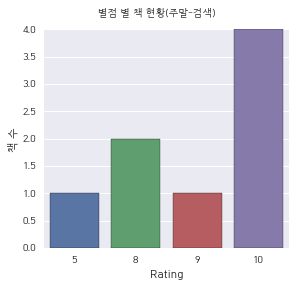

In [25]:
MeWeekRat_g = sns.factorplot('Rating', kind='count', data= Week_me_df)
MeWeekRat_g.fig.suptitle("별점 별 책 현황(주말-검색)")
MeWeekRat_g.set_ylabels("책 수")
MeWeekRat_g.fig.subplots_adjust(top=.9)

In [26]:
Week_Not_me = Week_df[Week_df['Read Reason'] != '검색'] # 주말넘기면서 내가 검색안한 것만 뽑기

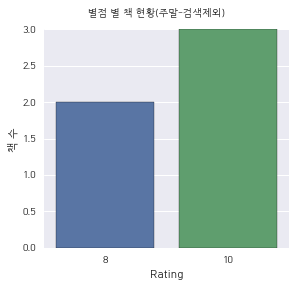

In [27]:
NotMeWeekRat_g = sns.factorplot('Rating', kind='count', data= Week_Not_me)
NotMeWeekRat_g.fig.suptitle("별점 별 책 현황(주말-검색제외)")
NotMeWeekRat_g.set_ylabels("책 수")
NotMeWeekRat_g.fig.subplots_adjust(top=.9)

###### 데이터 양이 작긴 하지만, 그래프를 봤을 때 대체적으로 책을 선택하는 것에 있어서 어려움을 느끼는것 같다.

### 책 읽은 시간 확인

###### book_times 데이터를 통한 책읽은 시간과 페이지수의 상관관계를 그래프로 확인

In [28]:
book_times['Read Page Num'] = book_times['End Page Num'] - book_times['Start Page Num'] # 페이지 수 변수
book_times['Spent time'] = ((book_times['End Read Time']- book_times['Start Read Time']).dt.seconds % 3600) // 60 # 읽은 시간 (분)

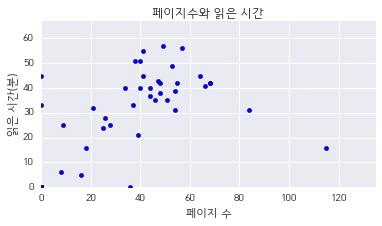

In [29]:
plt.scatter(book_times['Read Page Num'], book_times['Spent time']) # 상관관계 그래프를 위한 scatter plot
plt.title('페이지수와 읽은 시간') # plot의 제목
plt.xlabel('페이지 수') # xlabel
plt.ylabel('읽은 시간(분)') # ylabel
plt.xlim(0, book_times['Read Page Num'].max()+20) # x축 범위
plt.ylim(0, book_times['Spent time'].max()+10) # y축 범위
plt.gca().set_aspect('equal', adjustable='box') 